In [1]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("kashishparmar02/social-media-sentiments-analysis-dataset")
csv_path = os.path.join(path, "sentimentdataset.csv")
df = pd.read_csv(csv_path)

100%|██████████| 50.9k/50.9k [00:00<00:00, 35.5MB/s]

Extracting files...


In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20
731,732,736,Organizing a virtual talent show during challe...,Happy,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24.0,47.0,USA,2020,11,15,15


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [ ]:
# Data cleaning
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
df['Platform'] = df['Platform'].str.strip().str.capitalize()
df['Country'] = df['Country'].str.strip()
df['Sentiment'] = df['Sentiment'].str.strip()

In [ ]:
sentiment_counts = df.Sentiment.value_counts()
sentiment_counts

,count
Sentiment,
Positive,45
Joy,44
Excitement,37
Contentment,19
Neutral,18
...,...
Celestial Wonder,1
Nature's Beauty,1
Thrilling Journey,1


In [ ]:
df.groupby('Sentiment')['Retweets'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
Acceptance,8.0,17.000000,2.507133,15.0,15.00,16.5,18.00,22.0
Accomplishment,3.0,26.000000,3.464102,22.0,25.00,28.0,28.00,28.0
Admiration,4.0,21.750000,2.362908,20.0,20.00,21.0,22.75,25.0
Adoration,2.0,22.000000,0.000000,22.0,22.00,22.0,22.00,22.0
Adrenaline,1.0,22.000000,NaN,22.0,22.00,22.0,22.00,22.0
...,...,...,...,...,...,...,...,...
Winter Magic,1.0,30.000000,NaN,30.0,30.00,30.0,30.00,30.0
Wonder,3.0,36.666667,5.773503,30.0,35.00,40.0,40.00,40.0
Wonderment,1.0,35.000000,NaN,35.0,35.00,35.0,35.00,35.0


In [ ]:
df.groupby('Sentiment')['Likes'].describe()

,count,mean,std,min,25%,50%,75%,max
Sentiment,,,,,,,,
Acceptance,8.0,34.125000,5.303301,30.0,30.0,33.0,36.00,45.0
Accomplishment,3.0,51.666667,5.773503,45.0,50.0,55.0,55.00,55.0
Admiration,4.0,43.750000,4.787136,40.0,40.0,42.5,46.25,50.0
Adoration,2.0,45.000000,0.000000,45.0,45.0,45.0,45.00,45.0
Adrenaline,1.0,45.000000,NaN,45.0,45.0,45.0,45.00,45.0
...,...,...,...,...,...,...,...,...
Winter Magic,1.0,60.000000,NaN,60.0,60.0,60.0,60.00,60.0
Wonder,3.0,73.333333,11.547005,60.0,70.0,80.0,80.00,80.0
Wonderment,1.0,70.000000,NaN,70.0,70.0,70.0,70.00,70.0


In [ ]:
# Since there are too many kinds of sentiments and some only appear ones, we try to group them

threshold = 10
df['Sentiment_Grouped'] = df['Sentiment'].apply(lambda x: x if sentiment_counts[x] >= threshold else 'Other')

print(df['Sentiment_Grouped'].value_counts())

Sentiment_Grouped
Other          484
Positive        45
Joy             44
Excitement      37
Contentment     19
Neutral         18
Gratitude       18
Curiosity       16
Serenity        15
Happy           14
Despair         11
Nostalgia       11
Name: count, dtype: int64


In [10]:
# The method above leaves too many 'other' class even when the threshold is low, so we try another way

sentiment_categories = {
    "positive": [
        "Positive", "Joy", "Excitement", "Contentment", "Gratitude", "Curiosity",
        "Serenity", "Happy", "Nostalgia", "Hopeful", "Euphoria", "Enthusiasm",
        "Pride", "Elation", "Determination", "Inspiration", "Hope", "Inspired",
        "Empowerment", "Happiness", "Compassion", "Reverence", "Thrill",
        "Enchantment", "Acceptance", "Compassionate", "Tenderness", "Fulfillment",
        "Grateful", "Admiration", "Calmness", "Anticipation", "Love", "Amusement",
        "Accomplishment", "Satisfaction", "Adventure", "Wonder", "Harmony",
        "Empathetic", "Creativity", "Kind", "Confident", "Free-spirited", "Zest",
        "Affection", "Enjoyment", "Adoration", "Rejuvenation", "Resilience",
        "Coziness", "Exploration", "Mischievous", "Tranquility", "Whimsy",
        "Radiance", "Yearning", "Captivation", "FestiveJoy", "Intrigue", "Melodic",
        "Optimism", "Motivation", "JoyfulReunion", "Overjoyed", "Wonderment",
        "Appreciation", "Confidence", "Blessed", "Mindfulness", "Elegance", "Marvel",
        "Spark", "Adrenaline", "ArtisticBurst", "CulinaryOdyssey", "Immersion",
        "Freedom", "Dazzle", "InnerJourney", "DreamChaser", "Playful", "PlayfulJoy",
        "Amazement", "Success", "Friendship", "Romance", "Grandeur", "Energy",
        "Celebration", "Charm", "Ecstasy", "Colorful", "Positivity", "Kindness",
        "Touched", "Engagement", "Journey", "Iconic", "Connection", "Hypnotic",
        "Triumph", "Challenge", "Solace", "Heartwarming", "Sympathy", "Renewed Effort",
        "Mesmerizing", "Vibrancy", "Imagination", "Envisioning History", "Joy in Baking",
        "Breakthrough", "Culinary Adventure", "Winter Magic", "Ocean's Freedom",
        "Runway Creativity", "Creative Inspiration", "Celestial Wonder", "Nature's Beauty",
        "Thrilling Journey", "Relief", "Awe", "Proud"
    ],
    "negative": [
        "Despair", "Loneliness", "Grief", "Sad", "Embarrassed", "Confusion",
        "Melancholy", "Frustration", "Regret", "Numbness", "Bad", "Hate",
        "Betrayal", "Frustrated", "Bitterness", "Disgust", "Boredom", "Overwhelmed",
        "Negative", "Desolation", "Shame", "Dismissive", "Heartbreak", "Devastated",
        "Jealous", "Jealousy", "Resentment", "Bitter", "Envious", "Fearful",
        "Helplessness", "Intimidation", "Anxiety", "Anger", "Fear", "Sadness",
        "Envy", "Disappointed", "Disappointment", "Sorrow", "Loss", "Apprehensive",
        "Isolation", "Suffering", "EmotionalStorm", "Heartache", "Desperation",
        "Darkness", "Exhaustion", "Ruins", "LostLove", "Obstacle", "Pressure",
        "Miscalculation"
    ],
    "neutral": [
        "Neutral", "Indifference", "Surprise", "Ambivalence", "Reflection",
        "Arousal", "Emotion", "Contemplation", "Pensive", "Solitude", "Suspense",
        "Bittersweet", "Whispers of the Past"
    ]
}

def classify_sentiment(sentiment):
    s = sentiment.strip().lower()
    for category, sentiment_list in sentiment_categories.items():
        if s in [x.lower() for x in sentiment_list]:
            return category
    return 'other'

df['Sentiment'] = df['Sentiment'].str.strip()
df['Sentiment_category'] = df['Sentiment'].apply(classify_sentiment)

# User Engagement with Sentiment

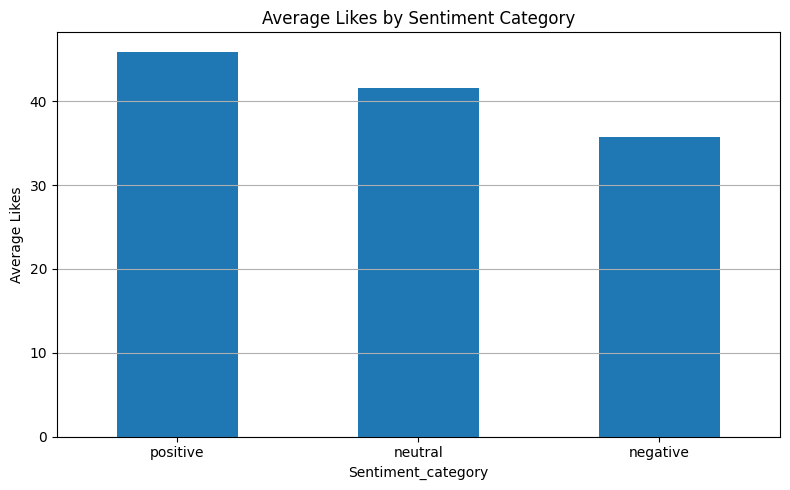

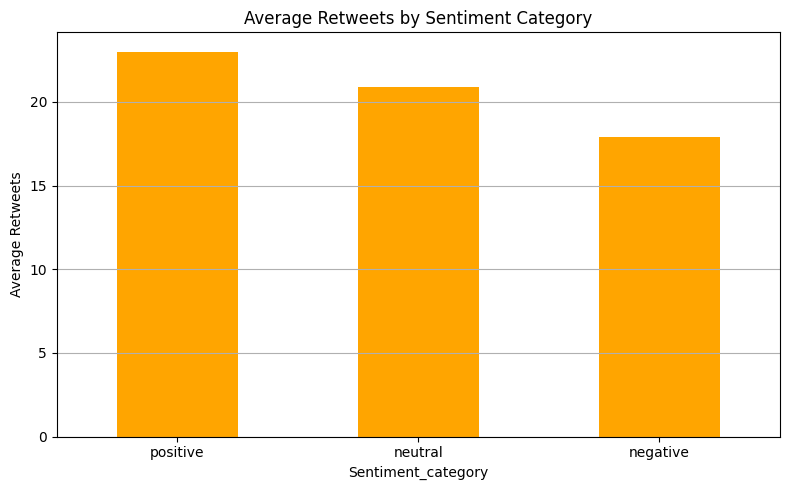

In [11]:
grouped_metrics = df.groupby('Sentiment_category')[['Likes', 'Retweets']].mean().sort_values(by='Likes', ascending=False)

# Plot Likes
plt.figure(figsize=(8, 5))
grouped_metrics['Likes'].plot(kind='bar')
plt.title('Average Likes by Sentiment Category')
plt.ylabel('Average Likes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Retweets
plt.figure(figsize=(8, 5))
grouped_metrics['Retweets'].plot(kind='bar', color='orange')
plt.title('Average Retweets by Sentiment Category')
plt.ylabel('Average Retweets')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

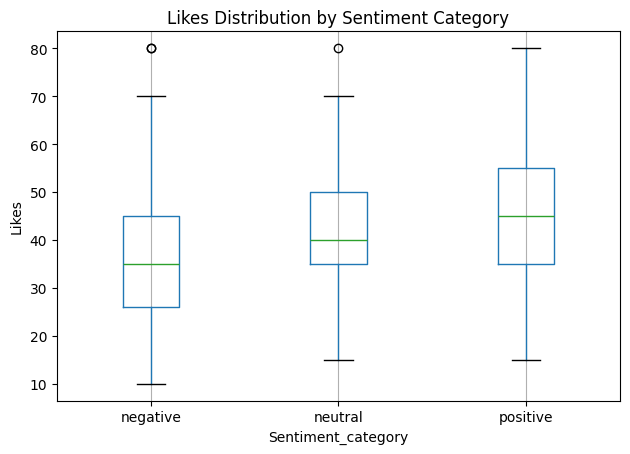

<Figure size 1000x600 with 0 Axes>

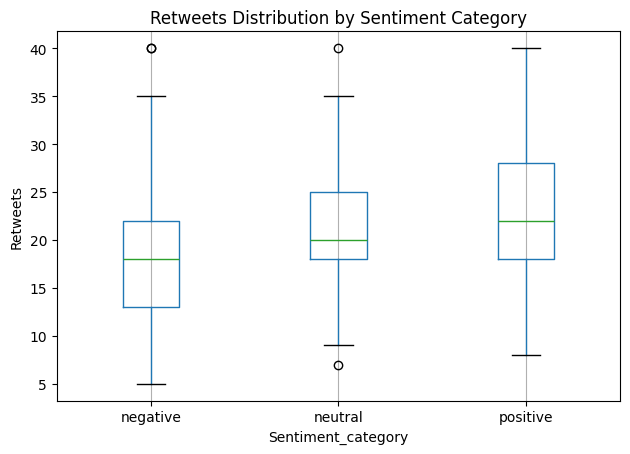

In [ ]:
df_box = df[df['Sentiment_category'].isin(['positive', 'negative', 'neutral'])]

# Box Plot for Likes
plt.figure(figsize=(10, 6))
df_box.boxplot(column='Likes', by='Sentiment_category')
plt.title('Likes Distribution by Sentiment Category')
plt.suptitle('')
plt.ylabel('Likes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Box Plot for Retweets
plt.figure(figsize=(10, 6))
df_box.boxplot(column='Retweets', by='Sentiment_category')
plt.title('Retweets Distribution by Sentiment Category')
plt.suptitle('')
plt.ylabel('Retweets')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**In general, positive content receives the most likes and shares, while negative content receives the least**
- This indicates that positive content is more popular or easier to spread
- There may also be platform factors, such as negative content being restricted from streaming or users being unwilling to forward negative content

**Specifically,**

Positive Sentiments:
- The high median and overall distribution indicate that positive emotions are generally more popular
- There are multiple obvious outliers, indicating that some positive content has a very high number of likes

Negative Sentiments:
- The median is significantly lower, meaning the performance is poor in general
- Although most negative content has poor dissemination, some outliers indicate few controversial or resonant posts can go viral

Neutral Sentiments:
- The distribution is narrow and the median is low, the overall fluctuation is small, and it is relatively stable but less attention-grabbing

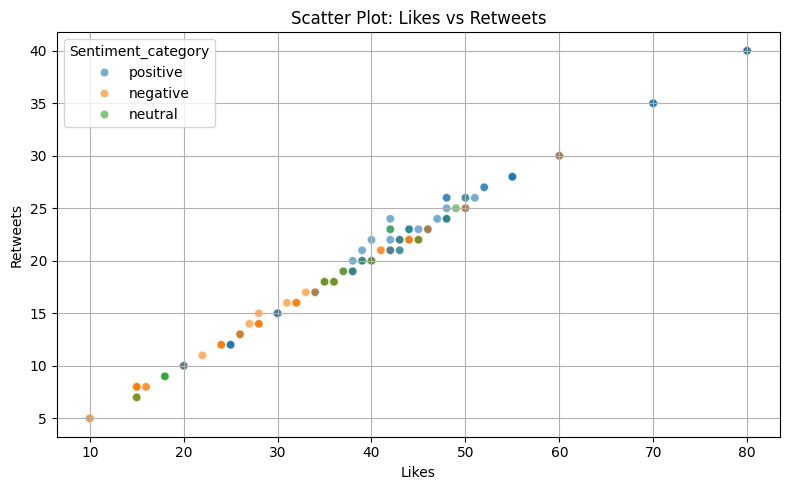

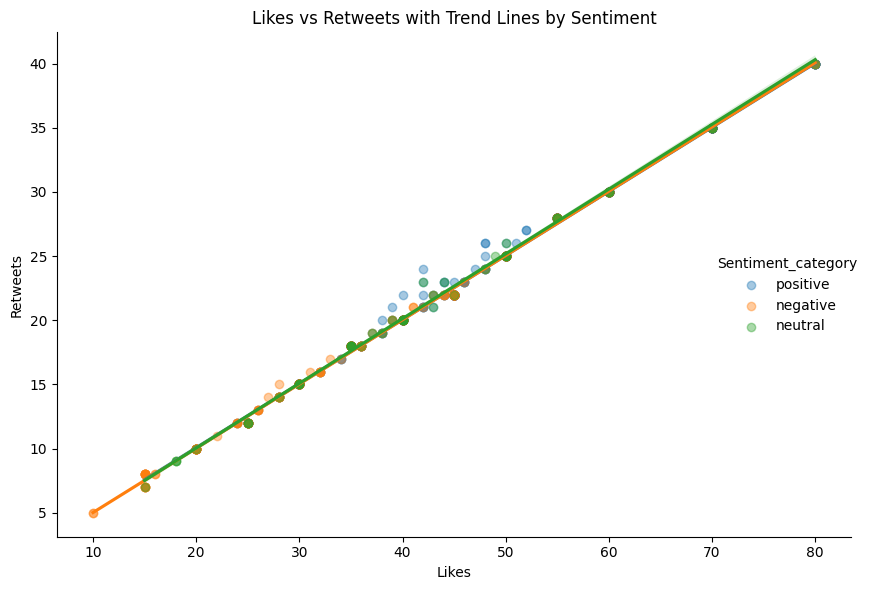

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Likes', y='Retweets', hue='Sentiment_category', alpha=0.6)
plt.title('Scatter Plot: Likes vs Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.grid(True)
plt.tight_layout()
plt.show()

sns.lmplot(data=df, x='Likes', y='Retweets', hue='Sentiment_category', aspect=1.2, height=6, scatter_kws={'alpha':0.4})
plt.title('Likes vs Retweets with Trend Lines by Sentiment')
plt.tight_layout()

- Likes and Retweets are strongly positively correlated, both linearly and in ranked order.

- This suggests that posts which get more likes also tend to be retweeted more, regardless of sentiment. Engagement and virality go hand-in-hand.

# Sentiments distribution by Platforms

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()
pd.set_option('display.max_rows', None)
print(sentiment_counts)

Sentiment
Positive                45
Joy                     44
Excitement              37
Contentment             19
Neutral                 18
Gratitude               18
Curiosity               16
Serenity                15
Happy                   14
Despair                 11
Nostalgia               11
Hopeful                  9
Loneliness               9
Awe                      9
Grief                    9
Sad                      9
Embarrassed              8
Confusion                8
Acceptance               8
Euphoria                 7
Enthusiasm               7
Pride                    7
Elation                  7
Determination            7
Melancholy               6
Frustration              6
Indifference             6
Surprise                 6
Ambivalence              6
Regret                   6
Numbness                 6
Playful                  6
Bad                      6
Inspiration              6
Hate                     6
Hope                     5
Inspired          

Since there are a lot of sentiments that only appeared few times, we first only consider those who appeared over 10 times.

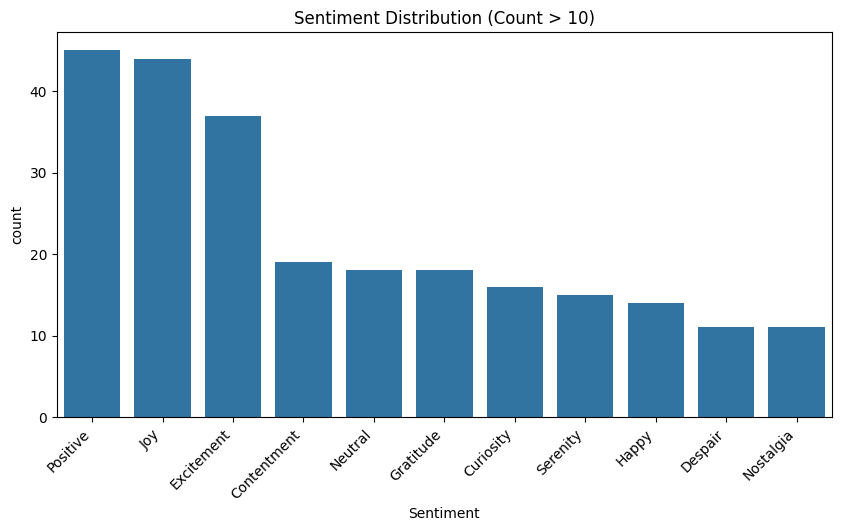

In [ ]:
sentiments_gt10 = sentiment_counts[sentiment_counts > 10].index
filtered_df = df[df["Sentiment"].isin(sentiments_gt10)]

plt.figure(figsize = (10, 5))
sns.countplot(data = filtered_df, x = "Sentiment", order = sentiments_gt10)
plt.title("Sentiment Distribution (Count > 10)")
plt.xticks(rotation = 45, ha = "right")  # Rotate labels for better visibility
plt.show()

Since the most frequent 3 sentiments are all positive, it is still not clear if we only focus on the frequent ones. Instead, we can categorize them to see further distribution.

In [ ]:
sentiment_categories = {
    "positive": [
        "Positive", "Joy", "Excitement", "Contentment", "Gratitude", "Curiosity",
        "Serenity", "Happy", "Nostalgia", "Hopeful", "Euphoria", "Enthusiasm",
        "Pride", "Elation", "Determination", "Inspiration", "Hope", "Inspired",
        "Empowerment", "Happiness", "Compassion", "Reverence", "Thrill",
        "Enchantment", "Acceptance", "Compassionate", "Tenderness", "Fulfillment",
        "Grateful", "Admiration", "Calmness", "Anticipation", "Love", "Amusement",
        "Accomplishment", "Satisfaction", "Adventure", "Wonder", "Harmony",
        "Empathetic", "Creativity", "Kind", "Confident", "Free-spirited", "Zest",
        "Affection", "Enjoyment", "Adoration", "Rejuvenation", "Resilience",
        "Coziness", "Exploration", "Mischievous", "Tranquility", "Whimsy",
        "Radiance", "Yearning", "Captivation", "FestiveJoy", "Intrigue", "Melodic",
        "Optimism", "Motivation", "JoyfulReunion", "Overjoyed", "Wonderment",
        "Appreciation", "Confidence", "Blessed", "Mindfulness", "Elegance", "Marvel",
        "Spark", "Adrenaline", "ArtisticBurst", "CulinaryOdyssey", "Immersion",
        "Freedom", "Dazzle", "InnerJourney", "DreamChaser", "Playful", "PlayfulJoy",
        "Amazement", "Success", "Friendship", "Romance", "Grandeur", "Energy",
        "Celebration", "Charm", "Ecstasy", "Colorful", "Positivity", "Kindness",
        "Touched", "Engagement", "Journey", "Iconic", "Connection", "Hypnotic",
        "Triumph", "Challenge", "Solace", "Heartwarming", "Sympathy", "Renewed Effort",
        "Mesmerizing", "Vibrancy", "Imagination", "Envisioning History", "Joy in Baking",
        "Breakthrough", "Culinary Adventure", "Winter Magic", "Ocean's Freedom",
        "Runway Creativity", "Creative Inspiration", "Celestial Wonder", "Nature's Beauty",
        "Thrilling Journey", "Relief", "Awe", "Proud"
    ],
    "negative": [
        "Despair", "Loneliness", "Grief", "Sad", "Embarrassed", "Confusion",
        "Melancholy", "Frustration", "Regret", "Numbness", "Bad", "Hate",
        "Betrayal", "Frustrated", "Bitterness", "Disgust", "Boredom", "Overwhelmed",
        "Negative", "Desolation", "Shame", "Dismissive", "Heartbreak", "Devastated",
        "Jealous", "Jealousy", "Resentment", "Bitter", "Envious", "Fearful",
        "Helplessness", "Intimidation", "Anxiety", "Anger", "Fear", "Sadness",
        "Envy", "Disappointed", "Disappointment", "Sorrow", "Loss", "Apprehensive",
        "Isolation", "Suffering", "EmotionalStorm", "Heartache", "Desperation",
        "Darkness", "Exhaustion", "Ruins", "LostLove", "Obstacle", "Pressure",
        "Miscalculation"
    ],
    "neutral": [
        "Neutral", "Indifference", "Surprise", "Ambivalence", "Reflection",
        "Arousal", "Emotion", "Contemplation", "Pensive", "Solitude", "Suspense",
        "Bittersweet", "Whispers of the Past"
    ]
}

def classify_sentiment(sentiment):
    for category, sentiment_list in sentiment_categories.items():
        if sentiment in sentiment_list:
            return category
    return 'other'

df['Sentiment_category'] = df['Sentiment'].apply(classify_sentiment)

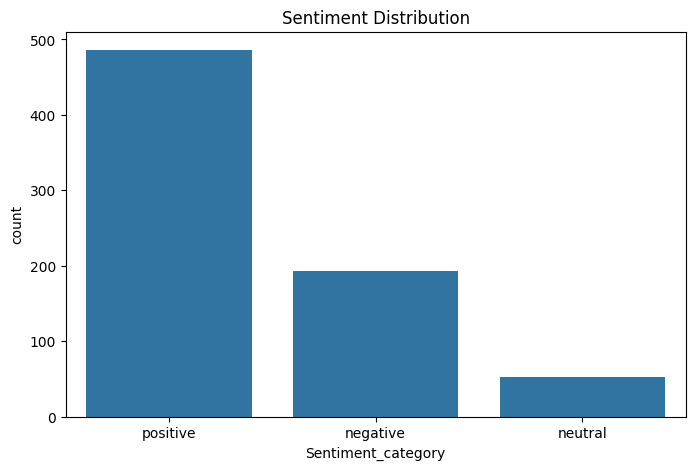

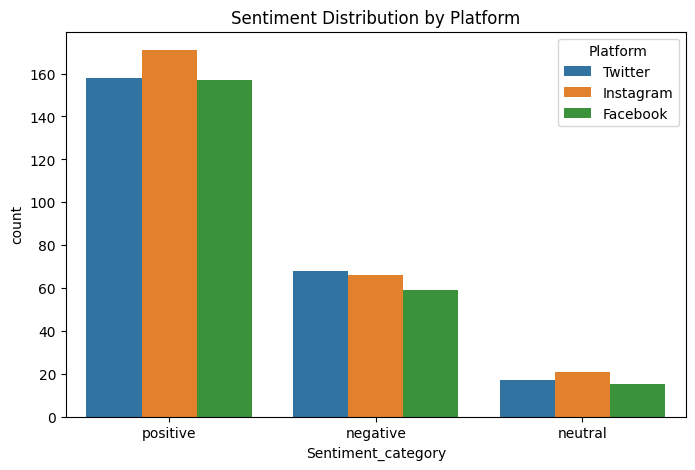

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = 'Sentiment_category')
plt.title('Sentiment Distribution')
plt.show()

plt.figure(figsize = (8, 5))
sns.countplot(data = df, x = 'Sentiment_category', hue = 'Platform')
plt.title('Sentiment Distribution by Platform')
plt.show()

From the 2 graphs, we can see the following results:

(1) Positive sentiments are much more than negative and neutral ones, and the amount of neutral sentiments are quite small.

(2) The sentiment distributions of  3 platforms are similar, i.e., there is no significant difference for each sentiment categories in 3 platforms.

# Sentiments Distribution by Countries

In [ ]:
country_counts = df['Country'].value_counts()
print(country_counts)

Country
USA               188
UK                143
Canada            135
Australia          75
India              70
Brazil             17
France             16
Japan              15
Germany            14
Italy              11
Spain               6
South Africa        6
Greece              5
Netherlands         4
Switzerland         3
Sweden              2
Portugal            2
Austria             2
Belgium             2
Denmark             2
Czech Republic      2
Jordan              1
Peru                1
Maldives            1
China               1
Cambodia            1
Norway              1
Colombia            1
Ireland             1
Jamaica             1
Kenya               1
Scotland            1
Thailand            1
Name: count, dtype: int64


Again, there are a lot of countries that only appeared a few times, we focus on those who appeared more than 50 times.

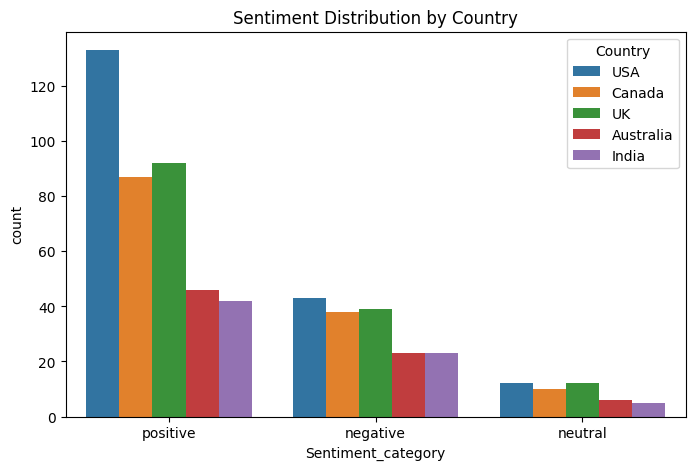

In [ ]:
country_gt50 = country_counts[country_counts > 50].index
filtered_df = df[df["Country"].isin(country_gt50)].copy()
filtered_df['Sentiment_category'] = filtered_df['Sentiment'].apply(classify_sentiment)

plt.figure(figsize = (8, 5))
sns.countplot(data = filtered_df, x = 'Sentiment_category', hue = 'Country')
plt.title('Sentiment Distribution by Country')
plt.show()

From the graph, we can see the following results:

(1) The sentiments in different countries also follow the distribution of positive, negative and neutral;

(2) There is no big difference between Australia and India, and between Canada and the UK;

(3) The distribution of negative and neutral sentiments in the USA is similar to that of Canada and the UK, but the USA has much more positive sentiments compared with all other countries.

# Distribution of likes & retweets by platforms

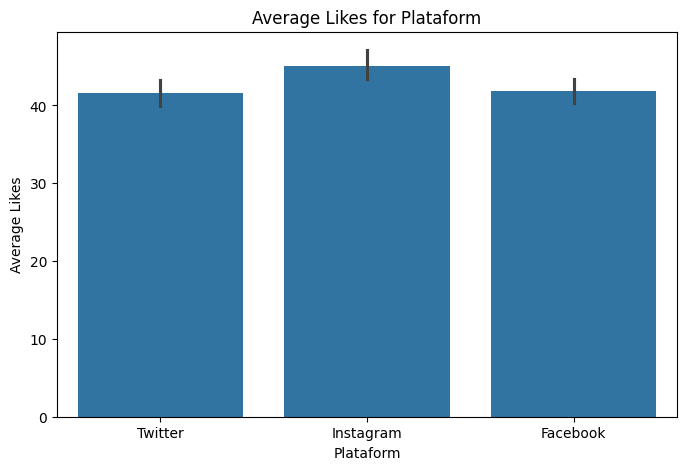

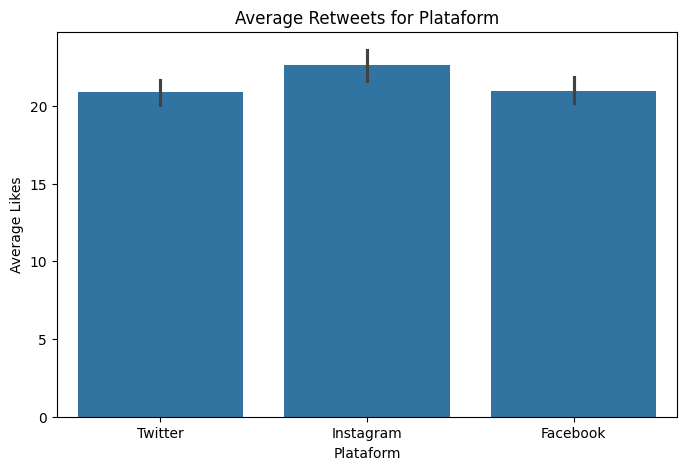

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = df['Platform'], y = df['Likes'], estimator = 'mean')
plt.title("Average Likes for Plataform")
plt.xlabel("Plataform")
plt.ylabel("Average Likes")
plt.show()

plt.figure(figsize = (8,5))
sns.barplot(x = df['Platform'], y = df['Retweets'], estimator = 'mean')
plt.title("Average Retweets for Plataform")
plt.xlabel("Plataform")
plt.ylabel("Average Likes")
plt.show()

From the above 2 graphs, we can conclude that the average likes and retweets for 3 platforms are roughly same, where those for Instagram are slightly higher than those of Twitter and Facebook.

# Distribution of Likes and Retweets by Countries

Here we still focus on the countries who appeared more than 50 times.

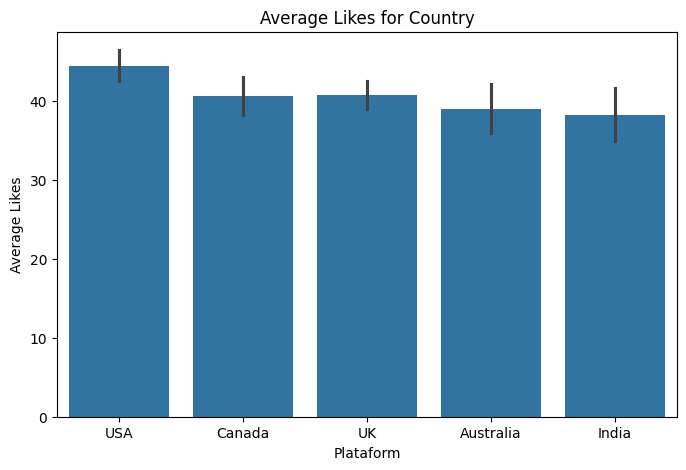

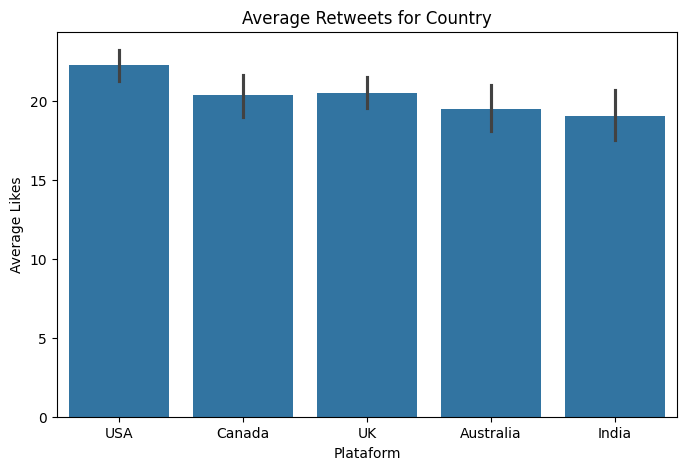

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = filtered_df['Country'], y = filtered_df['Likes'], estimator = 'mean')
plt.title("Average Likes for Country")
plt.xlabel("Plataform")
plt.ylabel("Average Likes")
plt.show()

plt.figure(figsize = (8,5))
sns.barplot(x = filtered_df['Country'], y = filtered_df['Retweets'], estimator = 'mean')
plt.title("Average Retweets for Country")
plt.xlabel("Plataform")
plt.ylabel("Average Likes")
plt.show()

Again, from the above 2 graphs, we can conclude that there is no significant difference among these active countries.

# Distribution of Sentiment by Time

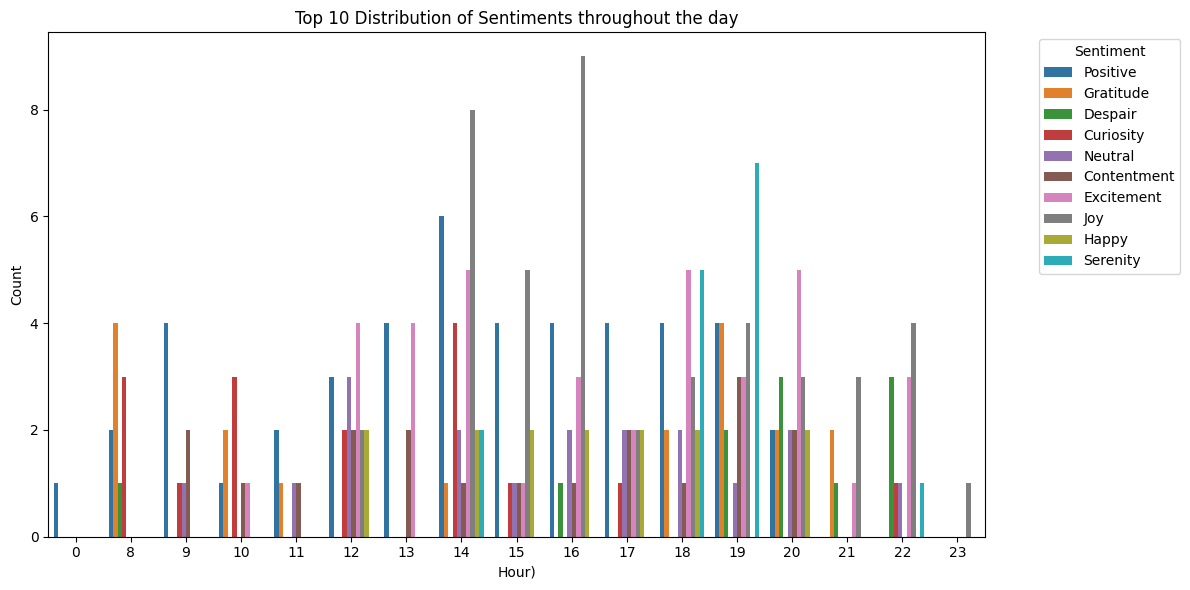

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['Timestamp'] = pd.to_datetime(df['Timestamp'])


df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year


top_sentiments = df['Sentiment'].value_counts().head(10).index
df_top = df[df['Sentiment'].isin(top_sentiments)]


plt.figure(figsize=(12,6))
sns.countplot(data=df_top, x='Hour', hue='Sentiment')
plt.title("Top 10 Distribution of Sentiments throughout the day")
plt.xlabel("Hour)")
plt.ylabel("Count")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

1. Midday to Early Evening (12:00–18:00) Is the Most Emotionally Active Period
The majority of emotional expressions are concentrated between 12 PM and 6 PM.

This includes peaks in:

Joy (especially around 14:00–16:00)

Excitement (steadily from 12:00 to 20:00)

Positive sentiment (notably peaking at 14:00)
2. Joy Stands Out with a Sharp Peak at 16:00
This is the highest individual sentiment count in the chart.

Suggests people feel most joyful during the late afternoon, possibly due to finishing tasks or anticipating the evening.
3. Excitement and Serenity in the Evening
Excitement is consistently present across many hours, with renewed spikes at 18:00 and 20:00.

Serenity shows a significant peak at 19:00, suggesting a sense of calm in the evening.

4. Early Morning (0–8 AM) Is Emotionally Quieter but Diverse
Though activity is lower, early morning hours contain:

Gratitude (notably at 8:00)

Despair and Curiosity

Suggests introspective or reflective posts during the start of the day.
5. Evening Reflections Continue Until 22:00
Emotions like Gratitude, Joy, Excitement, and Despair continue into the night.

Emotional diversity at night may reflect winding down, reflecting on the day, or social engagement time.

<ipython-input-25-dbe265d155c6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['MonthPeriod'] = df_top['Day'].apply(day_category)


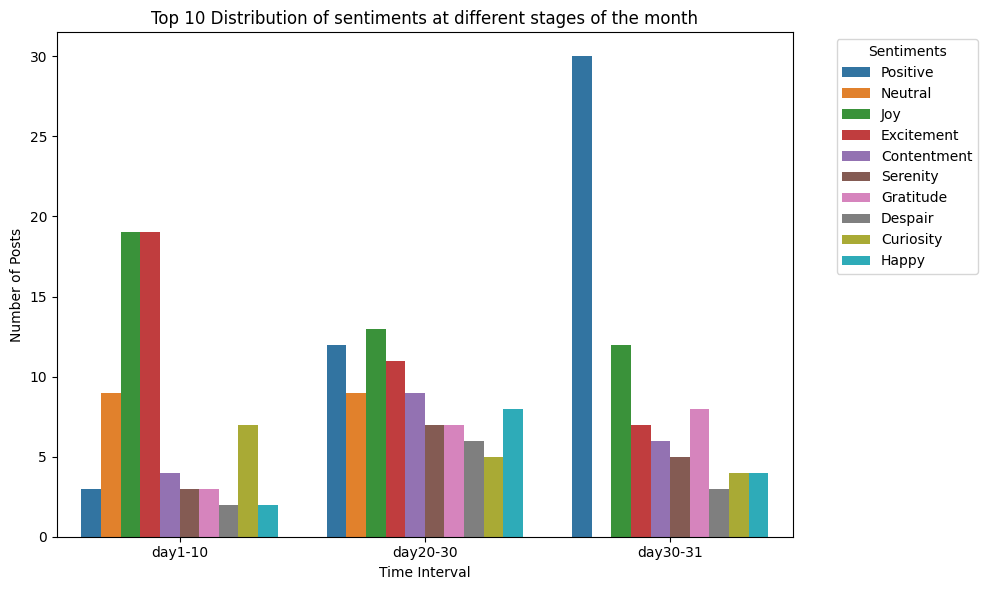

In [ ]:

def day_category(day):
    if day <= 10:
        return 'day1-10'
    elif day <= 20:
        return 'day20-30'
    else:
        return 'day30-31'

df_top['MonthPeriod'] = df_top['Day'].apply(day_category)

plt.figure(figsize=(10,6))
sns.countplot(data=df_top, x='MonthPeriod', hue='Sentiment', order=['day1-10', 'day20-30', 'day30-31'])
plt.title("Top 10 Distribution of sentiments at different stages of the month")
plt.xlabel("Time Interval")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiments", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


1. Positive Sentiment Spikes Dramatically at the End of the Month
At day30–31, Positive posts reach a significant high (~30 posts), much higher than in earlier periods.

This suggests people tend to reflect more positively at the end of the month, possibly due to goal completion or month-end evaluations.

2. Joy and Excitement Dominate at the Beginning of the Month
Both Joy and Excitement peak at day1–10, with ~19 posts each.

This indicates a high-energy, optimistic start to the month—often driven by fresh plans, motivation, and new beginnings.
3. Middle of the Month Shows Emotional Diversity
day20–30 features a broad spread of emotions, all fairly balanced:

Joy, Positive, Excitement, Neutral, Serenity, Gratitude, and even Despair all appear with moderate frequency.

This suggests a more mixed emotional state—likely tied to routine, stress, or mid-month progress.
4. Negative and Reflective Emotions Appear Steadily Throughout
Despair, Curiosity, and Gratitude appear consistently across all three time intervals but remain moderate in count.

Reflective emotions like Serenity and Contentment are more visible in the middle and end of the month.

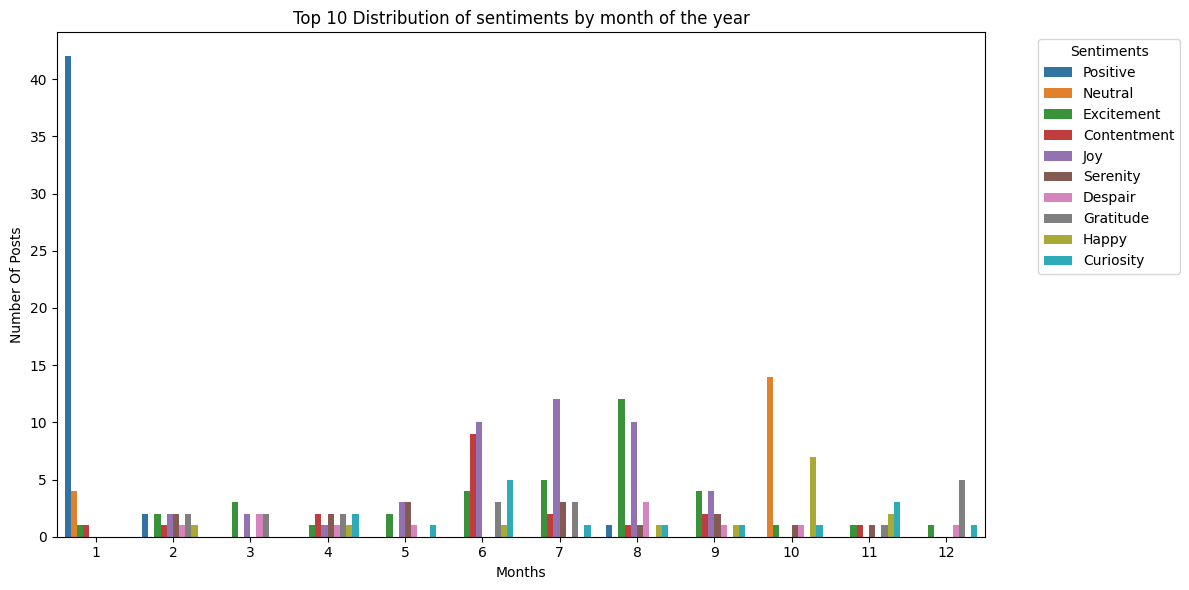

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_top, x='Month', hue='Sentiment')
plt.title("Top 10 Distribution of sentiments by month of the year")
plt.xlabel("Months")
plt.ylabel("Number Of Posts")
plt.legend(title="Sentiments", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


1. January Dominates with “Positive” Sentiment
There is an overwhelming spike in Positive sentiment in January, with over 40 posts.

This is by far the highest single sentiment count in the chart.

Suggests a strong New Year effect: motivation, resolutions, optimism.
2. Summer Months (June–August) Show Increased Emotional Diversity
Joy and Excitement are particularly high in June, July, and August.

Other emotions like Serenity, Curiosity, and Gratitude also appear more frequently.

Likely reflects the effect of summer vacations, relaxation, and increased social activity.
3. October Sees a Rise in “Neutral” and “Happy” Sentiments
October stands out for its peak in Neutral and a visible rise in Happy posts.

Suggests a period of emotional stability or balance—possibly due to cooler weather or fall transitions.
4. Other Months Show Relatively Balanced but Low Emotional Expression
Months like February through May, September, November, and December have a low but diverse emotional footprint.

Indicates less sentiment-driven activity or more evenly distributed emotional expressions.

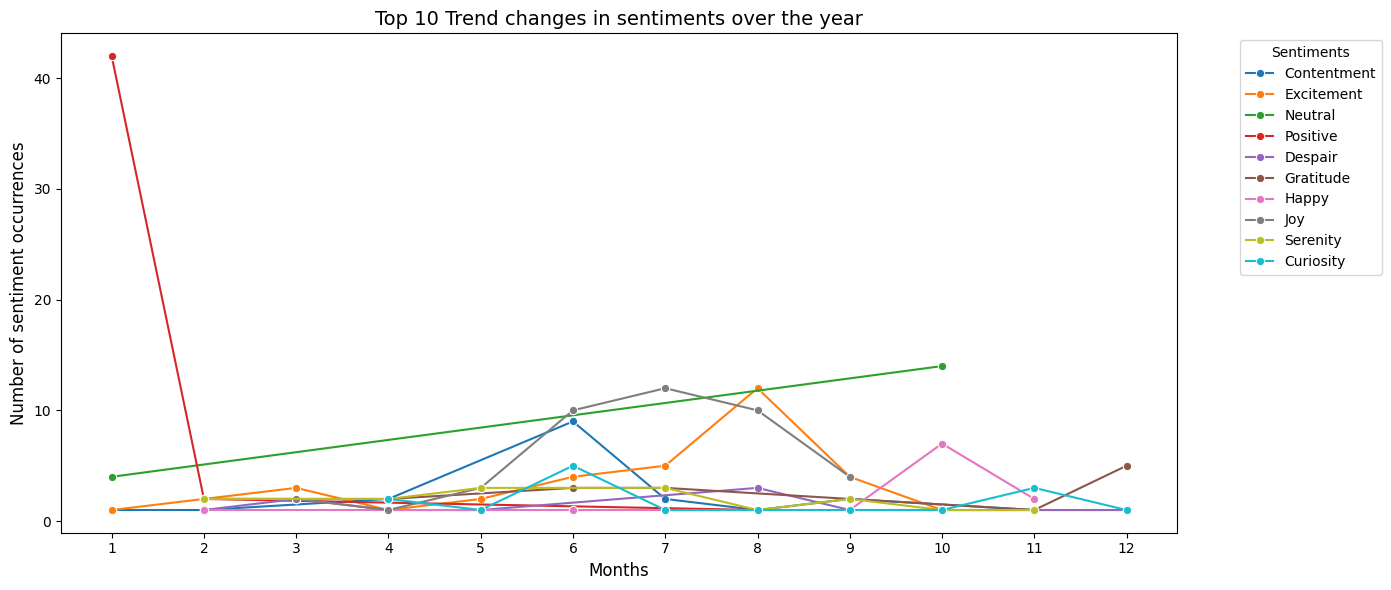

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].dt.month


top_sentiments = df['Sentiment'].value_counts().head(10).index
df_top = df[df['Sentiment'].isin(top_sentiments)]


monthly_sentiment = df_top.groupby(['Month', 'Sentiment']).size().reset_index(name='Count')

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sentiment, x='Month', y='Count', hue='Sentiment', marker='o')

plt.title("Top 10 Trend changes in sentiments over the year", fontsize=14)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Number of sentiment occurrences", fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title="Sentiments", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


1. Positive Sentiment Peaks Sharply in January and Disappears Thereafter
"Positive" sentiment spikes dramatically in January (over 40 occurrences), then quickly drops off to near-zero levels.

Indicates strong New Year optimism, followed by a normalization in emotional tone.

2. Neutral Sentiment Shows a Steady Upward Trend Throughout the Year
"Neutral" sentiment increases gradually from January to December.

Suggests a shift toward more balanced or less emotionally polarized content as the year progresses.
3. Excitement and Joy Build During Mid-Year and Drop in the Fall
Both "Joy" and "Excitement" climb between June and August, peaking in summer.

These emotions then decline by September–October, reflecting typical seasonal mood cycles (vacations, events, etc.).

4. Contentment Peaks in June and Dips After
A mini-peak for "Contentment" appears in June–July, aligning with summer downtime or personal satisfaction.

The trend quickly subsides toward year-end.

5. Gratitude and Happy Spike Later in the Year
“Happy” increases in October, possibly reflecting festive moods or end-of-year energy.

“Gratitude” has a visible jump in December, aligning well with year-end reflection or holiday season (e.g., Thanksgiving, New Year).

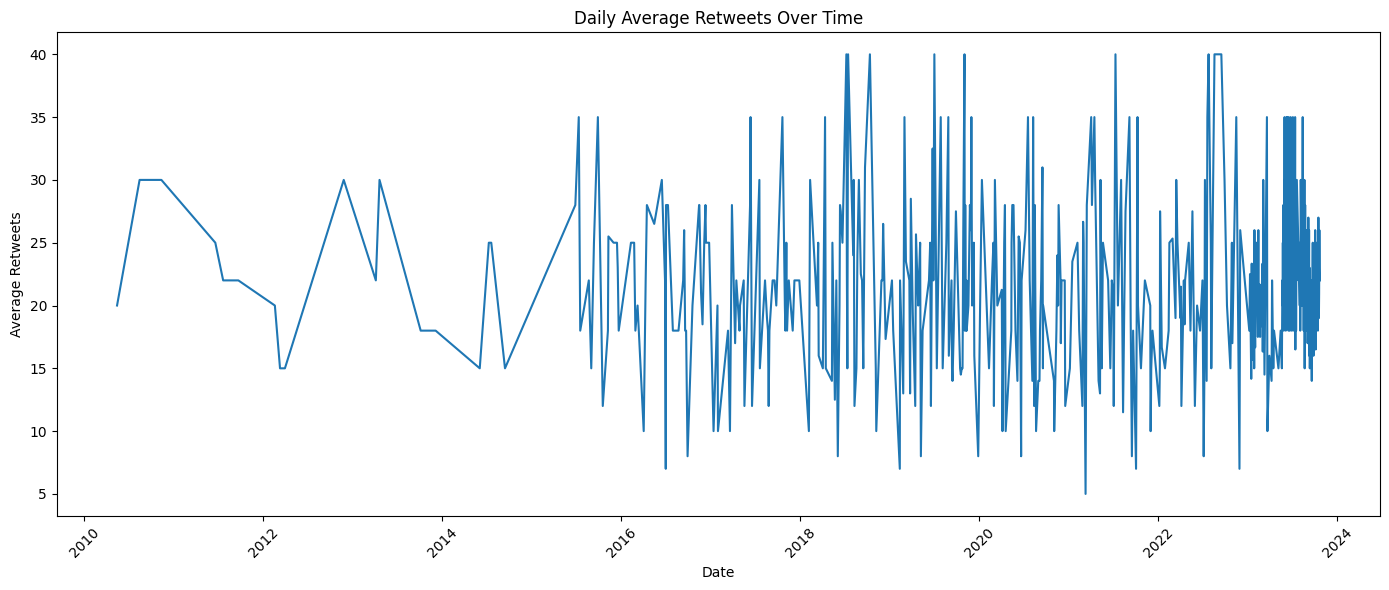

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Date'] = df['Timestamp'].dt.date

daily_retweets = df.groupby('Date')['Retweets'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_retweets, x='Date', y='Retweets')
plt.title("Daily Average Retweets Over Time")
plt.xlabel("Date")
plt.ylabel("Average Retweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From 2010 to 2024, daily average retweet counts showed a long-term pattern of rising volatility, peaking around 2018–2021, and slightly stabilizing in recent years—reflecting broader shifts in user behavior, content virality, and platform dynamics.

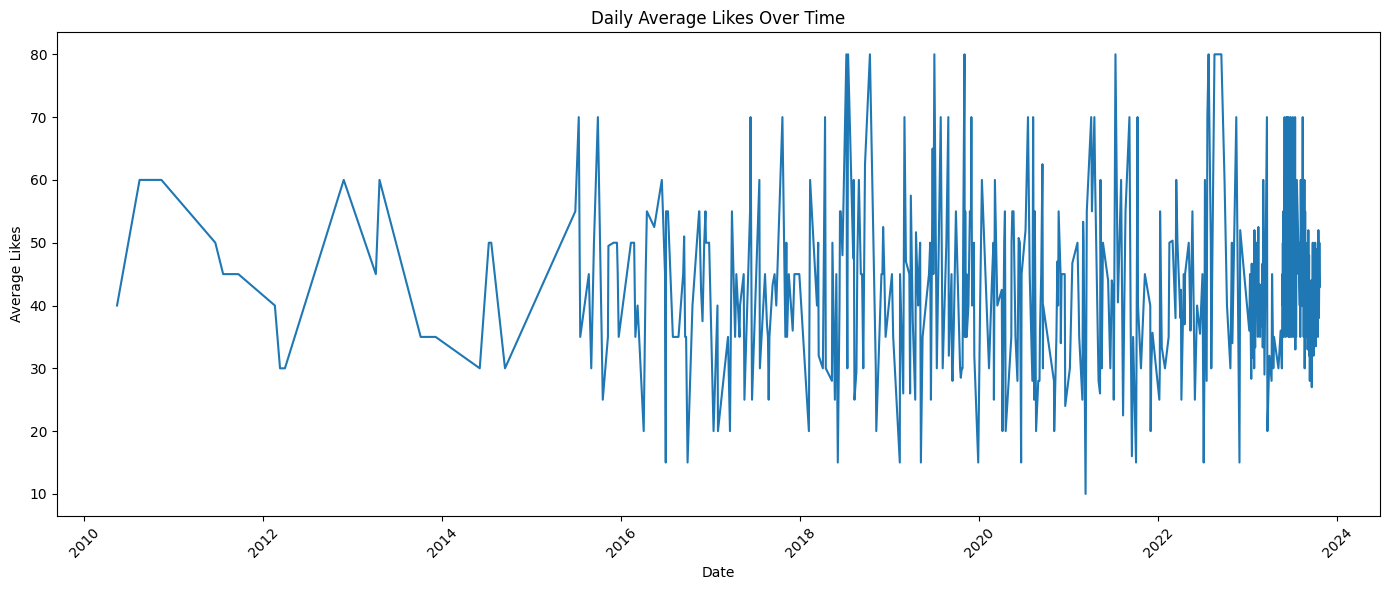

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Date'] = df['Timestamp'].dt.date

daily_likes = df.groupby('Date')['Likes'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_likes, x='Date', y='Likes')
plt.title("Daily Average Likes Over Time")
plt.xlabel("Date")
plt.ylabel("Average Likes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Over the years, daily average likes transitioned from early-stage stability (2010–2014), to a period of viral growth and volatility (2015–2021), and finally into a more stabilized, slightly declining phase (2022–2024), likely reflecting a maturing social media landscape.